Завдання для самостійного виконання

In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.decomposition import PCA
import time

# Завантаження та масштабування даних
digits = load_digits()
data_scaled = scale(digits.data)

#Виведення розмірності даних, кількість ознак і об'єктів, а також кількість унікальних значень міток
print("Розмірність даних:", digits.data.shape)
print("Кількість ознак:", digits.data.shape[1])
print("Кількість об'єктів:", digits.data.shape[0])
print("Кількість унікальних значень у векторі міток:", len(set(digits.target)))

Розмірність даних: (1797, 64)
Кількість ознак: 64
Кількість об'єктів: 1797
Кількість унікальних значень у векторі міток: 10


In [3]:
#Застосування KMeans з параметрами
n_clusters = len(set(digits.target))
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
start_time = time.time()
kmeans.fit(data_scaled)
end_time = time.time()

#Порівняння метрик та часу для KMeans з init='k-means++'
predicted_labels = kmeans.labels_
ari = adjusted_rand_score(digits.target, predicted_labels)
ami = adjusted_mutual_info_score(digits.target, predicted_labels)
execution_time = end_time - start_time
print("KMeans з init='k-means++':")
print("ARI:", ari)
print("AMI:", ami)
print("Час роботи алгоритму:", execution_time, "секунд")



KMeans з init='k-means++':
ARI: 0.5700617793517045
AMI: 0.695649512782462
Час роботи алгоритму: 0.6755809783935547 секунд


In [4]:
#Аналогічно для KMeans з init='random'
kmeans_random_init = KMeans(init='random', n_clusters=n_clusters, n_init=10)
start_time_random = time.time()
kmeans_random_init.fit(data_scaled)
end_time_random = time.time()
predicted_labels_random = kmeans_random_init.labels_
ari_random = adjusted_rand_score(digits.target, predicted_labels_random)
ami_random = adjusted_mutual_info_score(digits.target, predicted_labels_random)
execution_time_random = end_time_random - start_time_random
print("\nKMeans з init='random':")
print("ARI:", ari_random)
print("AMI:", ami_random)
print("Час роботи алгоритму:", execution_time_random, "секунд")



KMeans з init='random':
ARI: 0.529139838878173
AMI: 0.66018284472495
Час роботи алгоритму: 0.2925846576690674 секунд


In [5]:
#Застосування методу PCA
pca = PCA(n_components=len(set(digits.target)))
data_pca = pca.fit_transform(data_scaled)

# створення моделі KMeans з init=pca.components_
kmeans_with_pca_init = KMeans(init=pca.components_, n_clusters=n_clusters, n_init=10)
start_time_pca = time.time()
kmeans_with_pca_init.fit(data_scaled)
end_time_pca = time.time()
predicted_labels_pca_init = kmeans_with_pca_init.labels_
ari_pca = adjusted_rand_score(digits.target, predicted_labels_pca_init)
ami_pca = adjusted_mutual_info_score(digits.target, predicted_labels_pca_init)
execution_time_pca = end_time_pca - start_time_pca
print("\nKMeans з init=pca.components_:")
print("ARI:", ari_pca)
print("AMI:", ami_pca)
print("Час роботи алгоритму:", execution_time_pca, "секунд")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)



KMeans з init=pca.components_:
ARI: 0.5575805385214234
AMI: 0.6777864997857813
Час роботи алгоритму: 0.18528437614440918 секунд


In [6]:
#Порівняння підходів
print("\nПорівняння підходів:")
print("KMeans з init='k-means++':")
print("ARI:", ari)
print("AMI:", ami)
print("Час роботи алгоритму:", execution_time, "секунд")
print("\nKMeans з init='random':")
print("ARI:", ari_random)
print("AMI:", ami_random)
print("Час роботи алгоритму:", execution_time_random, "секунд")
print("\nKMeans з init=pca.components_:")
print("ARI:", ari_pca)
print("AMI:", ami_pca)
print("Час роботи алгоритму:", execution_time_pca, "секунд")



Порівняння підходів:
KMeans з init='k-means++':
ARI: 0.5700617793517045
AMI: 0.695649512782462
Час роботи алгоритму: 0.6755809783935547 секунд

KMeans з init='random':
ARI: 0.529139838878173
AMI: 0.66018284472495
Час роботи алгоритму: 0.2925846576690674 секунд

KMeans з init=pca.components_:
ARI: 0.5575805385214234
AMI: 0.6777864997857813
Час роботи алгоритму: 0.18528437614440918 секунд


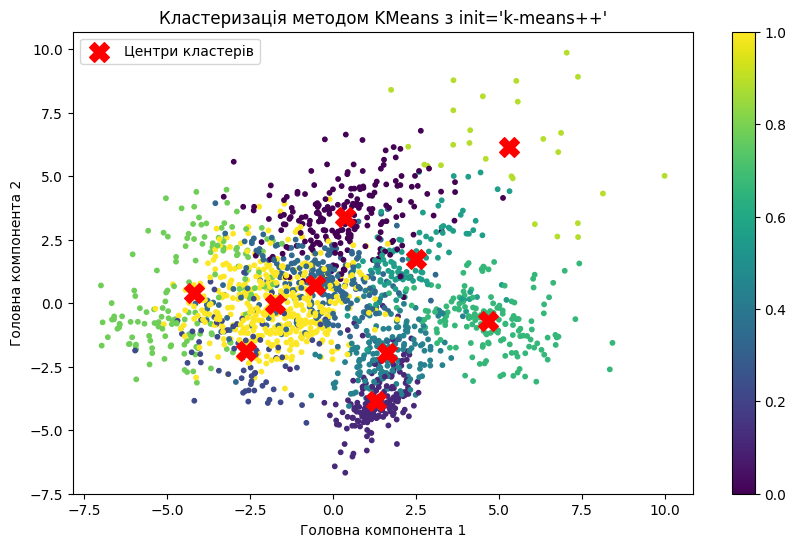

In [16]:
import matplotlib.pyplot as plt

# Зменшення розмірності за допомогою PCA для візуалізації даних на 2D площині
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Побудова KMeans з вибраним методом ініціалізації
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(data_scaled)

# Відображення точок даних з розфарбуванням за кластерами
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans.labels_, cmap='viridis', s=10)

# Відображення центрів кластерів
centers_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', marker='X', s=200, label='Центри кластерів')

plt.title('Кластеризація методом KMeans з init=\'k-means++\'')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.legend()
plt.colorbar()
plt.show()




Додаткове завдання

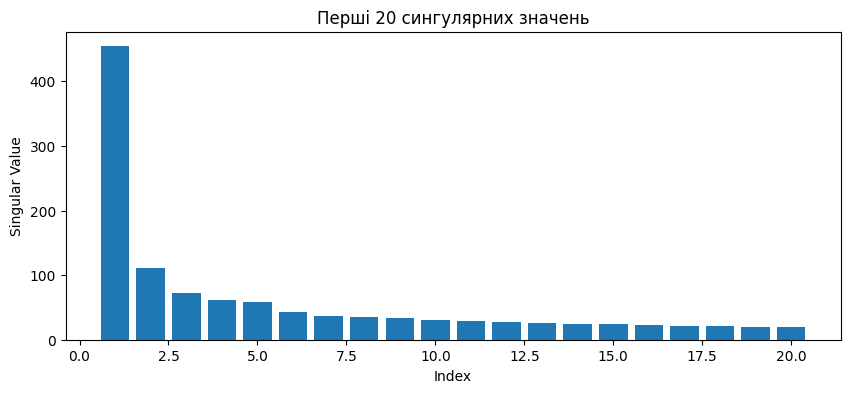

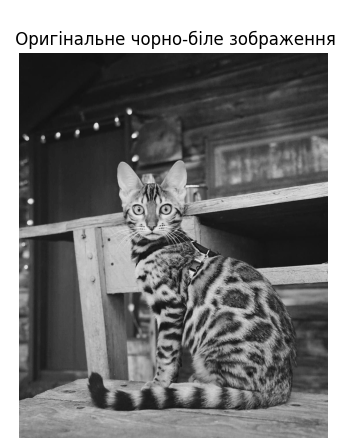

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from numpy.linalg import svd

#  Завантаження та перетворення зображення
image_path = 'catphoto.jpg'  # Замініть 'path_to_your_image.jpg' на шлях до свого зображення
image = io.imread(image_path)

# Перевіряємо, чи зображення кольорове, і якщо так, перетворюємо його у відтінки сірого
if len(image.shape) == 3:
    image_gray = color.rgb2gray(image)
else:
    image_gray = image

# Виконання SVD
U, s, Vt = svd(image_gray, full_matrices=False)

#Аналіз сингулярних значень
#Візуалізація перших 20 сингулярних значень
plt.figure(figsize=(10, 4))
plt.bar(range(1, 21), s[:20])
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Перші 20 сингулярних значень')
plt.show()

#Додатково: візуалізація зображення
plt.figure(figsize=(5, 5))
plt.imshow(image_gray, cmap='gray')
plt.title('Оригінальне чорно-біле зображення')
plt.axis('off')
plt.show()


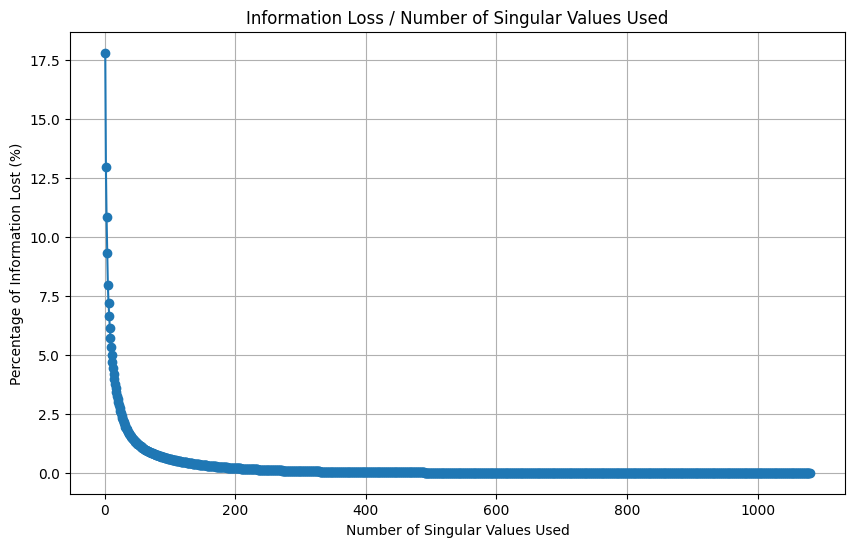

In [25]:
# Розрахунок втраченої інформації
total_variance = np.sum(s**2)  # Сума квадратів всіх сингулярних значень
retained_variances = np.cumsum(s**2) / total_variance  # Накопичувана сума квадратів

retained_information_percentages = retained_variances * 100  # Відсоток збереженої інформації
lost_information_percentages = 100 - retained_information_percentages  # Відсоток втраченої інформації

# Візуалізація втраченої інформації
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(s)+1), lost_information_percentages, marker='o')
plt.xlabel('Number of Singular Values Used')
plt.ylabel('Percentage of Information Lost (%)')
plt.title('Information Loss / Number of Singular Values Used')
plt.grid(True)
plt.show()


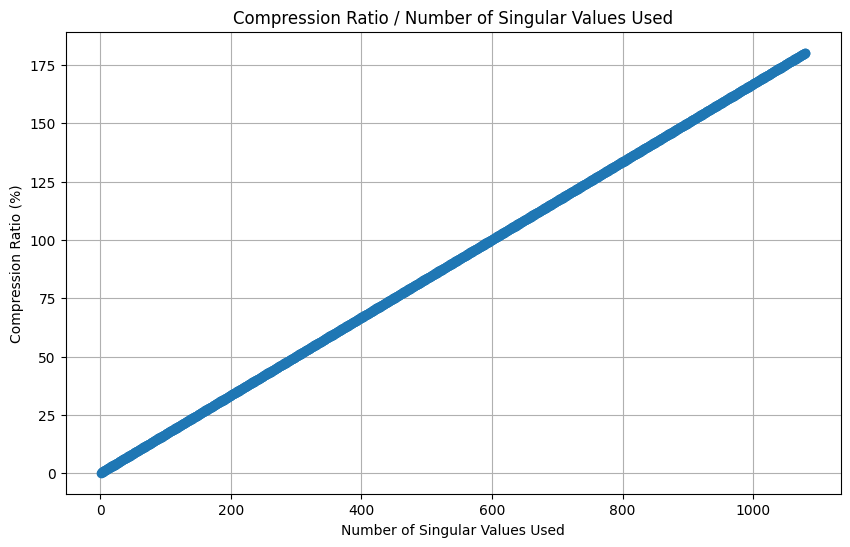

In [28]:
# Припускаємо, що U, s, Vt вже отримані від SVD
m, n = image_gray.shape

# Розрахунок стиснення
compression_ratios = []
for k in range(1, len(s)+1):
    num_elements_original = m * n
    num_elements_compressed = (m * k) + k + (k * n)
    compression_ratio = (num_elements_compressed / num_elements_original) * 100
    compression_ratios.append(compression_ratio)

# Візуалізація стиснення
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(s)+1), compression_ratios, marker='o')
plt.xlabel('Number of Singular Values Used')
plt.ylabel('Compression Ratio (%)')
plt.title('Compression Ratio / Number of Singular Values Used')
plt.grid(True)
plt.show()


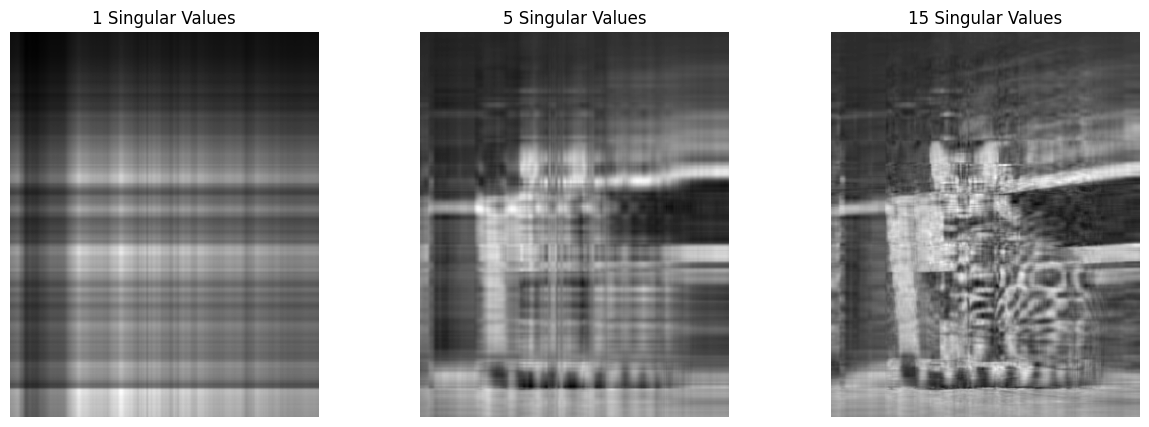

In [32]:
# Відтворення зображення для різної кількості сингулярних значень
singular_values = [1, 5, 15]  # Кількість сингулярних значень для відтворення зображення
fig, axs = plt.subplots(1, len(singular_values), figsize=(15, 5))

for i, k in enumerate(singular_values):
    # Апроксимація зображення з використанням k сингулярних значень
    image_approx = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

    # Візуалізація апроксимованого зображення
    axs[i].imshow(image_approx, cmap='gray')
    axs[i].set_title(f'{k} Singular Values')
    axs[i].axis('off')

plt.show()